In [30]:
# Run this cell to load libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

<p><H1> DSCI 100 Project - 006/Group 4</H1></p><br>
<H4>By: Aiva Cay, Rowan Milligan, Nate Schweigel, & Jaisal Sharma</H4></p>

<H2><strong>Predicting Game-related Newsletter Subscription of Minecraft players </strong></H2>


## Introduction: ##

This data science project will analyze data from Plaicraft, a game created by a research group looking to advance the usage of artifical intelligence in video games by the Pacific Laboratory for Artificial Intelligence (PLAI) based in the computer science department of UBC. Their website, (https://plaicraft.ai/), hosts a version of the popular video game Minecraft for free, allowing Artificial Intelligence to analyze the participants' gameplay. The ultimate goal of this is to train and develop an advanced AI to assist gamers. With this research, data has been collected about the players, which we will use for this project to better understand the players and determine what characteristics influence subscription.

The question we are looking to answer in this project is: \
**How likely will a new player subscribe to a game-related newsletter based on their age, number of played hours and gaming sessions?** 

The question is very clearly asking to find a method of classifying whether the player would subscribe or not to an in game newsletter, a measure of player engagement with the game. To achieve this, we will use a KNN model to compare new players to the most similar past players based on these characteristics. After loading the 2 datasets, we see the data is formatted as follows:

<h2>Methods</h2>

<h4>Creating a K-nearest Neighbour Model</h4>

<ol>
  <li>Load the <strong>players</strong> and <strong>sessions</strong> dataset</li>
  <li>Tidy the data </li>
  <li>Visualize the data</li>
  <li>Split the dataset into testing and training sets</li>
  <li>Standardize the predictors </li>
  <li>Train the K-nearest neighbours classifier to select the best K-nearest neighbour</li>
  <li>Cross-validation of the dataset</li>
  <li>Train the model with the best neighbour</li>
  <li>Test predictions of KNN model </li>
  <li>Evalutate accuracy of model</li>
</ol>

## 1. Loading the Dataset ##

We used `read_csv` to load both online datasets \
We used `inner_join` to merge both datasets into one 

In [31]:
players <- read_csv("https://raw.githubusercontent.com/acay05/dsci-100-2025W2-006-group4/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/acay05/dsci-100-2025W2-006-group4/refs/heads/main/sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


**Figure 1** \
We can see that the `players` dataset is missing `Age` values in one of the rows which will need to be filtered out in the next step. 

We can also see that both datasets report the `hashedEmail` of the players which can be used to merge the two datasets using the `inner_join` function.

## 2. Tidying the Data ##

We will analyze the `Age` and `played_hours` columns and also create a count of player sessions by using the number of times a user logged on as a count for each playing session on the game.

We used `filter` to remove the rows where age is missing in the `players` dataset and filtered those same players out in the `sessions` dataset as well. 

In [32]:
players <- players |>
    filter(!is.na(Age))
sessions <- sessions |>
    filter(!hashedEmail == "7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d") |>
    filter(!hashedEmail == "d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11")

We used `inner_join` to merge `players` and `sessions` into one dataset called `sessions_plus` 

In [33]:
sessions_plus <- inner_join(players, sessions)
sessions_plus

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35,1.72308e+12,1.72308e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37,1.72592e+12,1.72592e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25,1.72308e+12,1.72309e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,09/09/2024 02:17,09/09/2024 02:45,1.72585e+12,1.72585e+12
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,23/08/2024 21:39,23/08/2024 21:53,1.72445e+12,1.72445e+12
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,08/09/2024 19:40,08/09/2024 19:45,1.72582e+12,1.72582e+12


**Figure 2** \
We can see that `sessions_plus` now includes all information on the players as one dataset, however there are multiple entries for the same player.

We used `group_by` to group the players by their `hashedEmail` \
`summarize` to count the total number of playing sessions \
`inner_join` to merge the counted data to the player information \
We used `select` since we were only interested in using `played_hours`, `Age`, and `sessions_counted` as the predictors for `subscribe`\
We also used `mutate` to treat the `subscribe` column as a factor

In [34]:
sessions_counted <- group_by(sessions_plus, hashedEmail) |>
    summarize(sessions_count = n()) |>
    inner_join(players)
selected_counted <- sessions_counted |>
    select(played_hours, Age, sessions_count, subscribe) |>
    mutate(subscribe = as.factor(subscribe))
selected_counted

Joining with `by = join_by(hashedEmail)`


played_hours,Age,sessions_count,subscribe
<dbl>,<dbl>,<int>,<fct>
1.5,20,2,TRUE
0.4,21,1,FALSE
0.1,17,1,TRUE
⋮,⋮,⋮,⋮
56.1,23,310,TRUE
0.1,17,1,TRUE
1.1,20,1,TRUE


**Figure 3** \
We can see that the `selected_counted` data frame only contains the predictors and class variables for our model.

### Column Names ### 
`played_hours` - A person's hours played on the Plaicraft website. \
`Age` - Age of the player in years. \
`sessions_count` - Number of sessions logged on Plaicraft, counts up once for every time a player logs on to play. \
`subscribe` - Whether a player signed up for the newsletter, can only be TRUE or FALSE. 


### Summary of Data ### 

In [35]:
summarized_players <- selected_counted |> 
    select(played_hours, Age, sessions_count) |>
    filter(!is.na(Age)) |>
    map_dfr(mean)
summarized_players

played_hours,Age,sessions_count
<dbl>,<dbl>,<dbl>
9.313008,20.60976,12.46341


**Figure 4** \
Above we find the mean values of `Age`, `sessions_count`, and `played_hours` variables from the `seleced_counted` dataframe.

## 3. Visualizing the Data ## 

Now, we can make some exploratory visualizations to better understand the data and see if we can find some trends before doing any analysis.

**Plot 1** \
This first visualization is a histogram displaying the amount of hours played per user to observe the distribution.

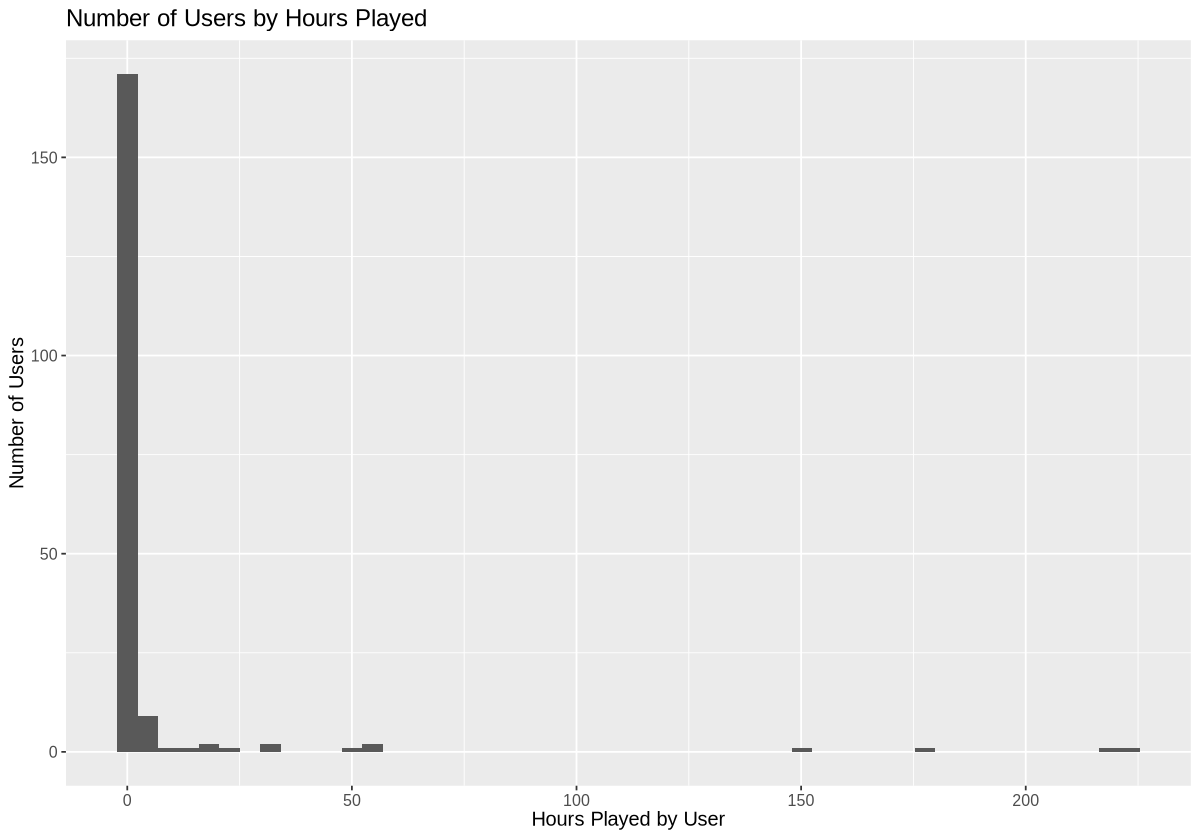

In [28]:
options(repr.plot.width = 10, repr.plot.height = 7)

played_hours_plot <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 50) +
    labs(x = "Hours Played by User", y = "Number of Users", title = "Number of Users by Hours Played") +
    theme(text = element_text(size = 12))
played_hours_plot

**Figure 5** \
From the histogram of `played_hours`we can observe that most of the players played very little, with the majority of player lifetime logged hours on the game being below 10. 

**Plot 2** \
Then we can create a scatter plot comparing two of our numerical variables (`Age` and `played_hours`) to observe if trends are clearly visible in willingess to subscribe to the newsletter.

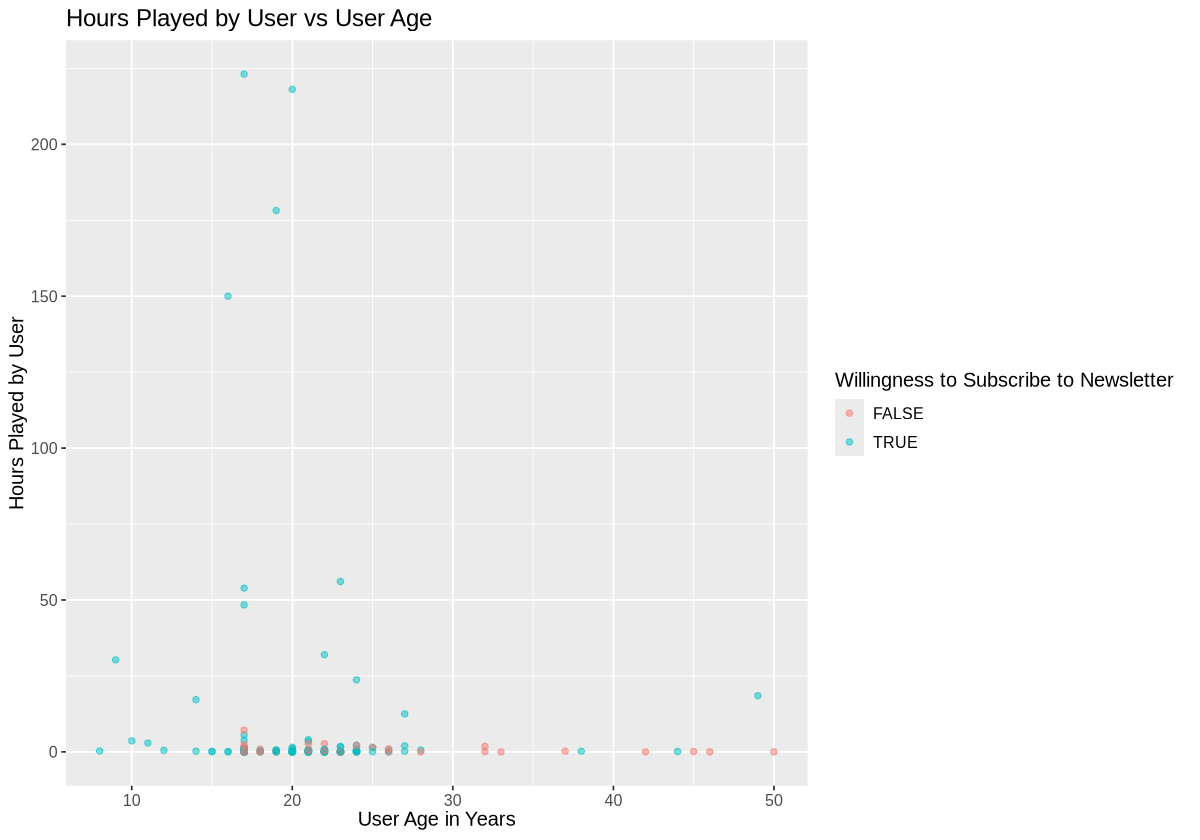

In [12]:
age_hour_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "User Age in Years", y = "Hours Played by User", 
         colour = "Willingness to Subscribe to Newsletter", title = "Hours Played by User vs User Age") +
    theme(text = element_text(size = 12))
age_hour_plot

**Figure 6** \
We can see that subscribers tend to be below the age of 30 and the hours played for subscribers are widely distributed. 

**Plot 3** \
To factor in our other variable, `sessions_counted`, we can create a similar plot, comparing `sessions_count` with `played_hours` to see newsletter subscription trends.

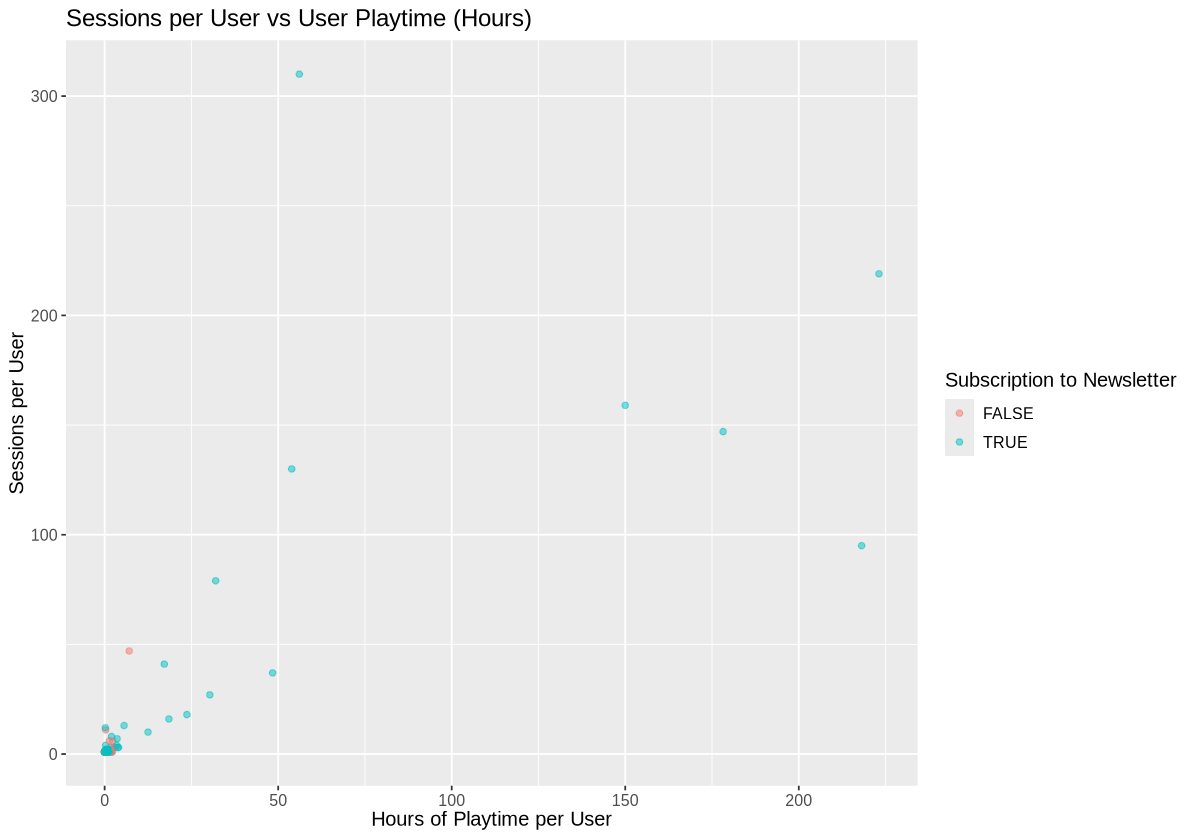

In [38]:
age_session_plot <- selected_counted |>
    ggplot(aes(x = played_hours, y = sessions_count, colour = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "Hours of Playtime per User", y = "Sessions per User", 
         colour = "Subscription to Newsletter", title = "Sessions per User vs User Playtime (Hours)") +
    theme(text = element_text(size = 12))
age_session_plot

**Figure 7**\
From the scatter plot of `played_hours` vs `sessions_count` it can be observed that most players only had 1 session of about 1-5 hours. However due to the large variance of data points it is hard to draw a clear relationship between the variables.

**Plot 4** \
Since most of the data points are for less than 5 `played_hours`, it will be easier for analysis if we limit the x-axis to that on the plot of `played_hours` vs `sessions_count`. Y-axis is also limited to allow for easier viewing of datapoints.

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


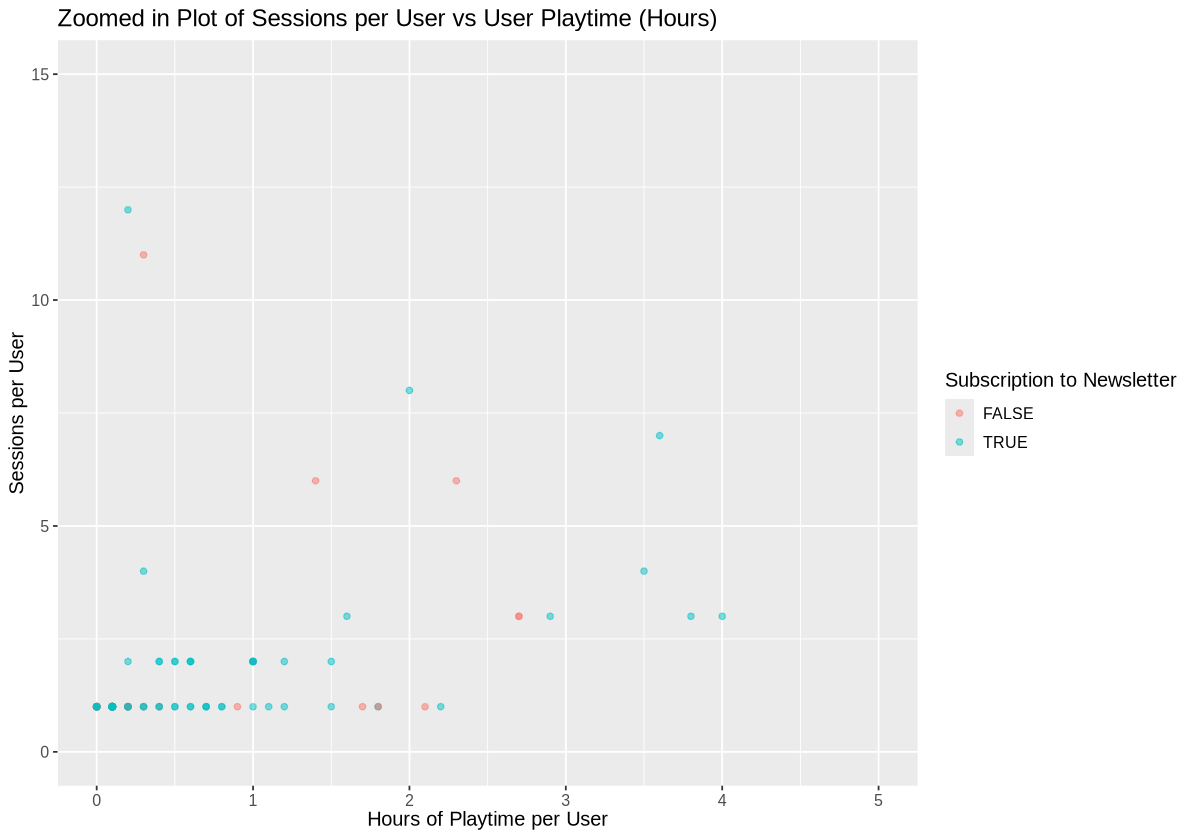

In [39]:
age_session_plot_zoomed_in <- selected_counted |>
    ggplot(aes(x = played_hours, y = sessions_count, colour = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "Hours of Playtime per User", y = "Sessions per User", 
         colour = "Subscription to Newsletter", title = "Zoomed in Plot of Sessions per User vs User Playtime (Hours)") +
    theme(text = element_text(size = 12)) +
    xlim(c(0,5)) +
    ylim(c(0, 15))
age_session_plot_zoomed_in

**Figure 8**\
Now that the x-axis has been limited to 5 `played_hours` or less, it is easier to observe the data. We can see that there is no strong trend on the plot. However, the most amount of people who said no to the newsletter were most frequent into the middle of this plot, possibly pointing at players who played for a little while but not a very low amount of time are more likely to sign up.

## 4. Splitting the Data ##
We will start to create our KNN classification for predicting whether users will subscribe to the newsletter.
First, we use `initial_split` to separate 75% of the data to train our model and 25% to test our model. The model will not access the testing data until the last prediction step, which will ensure we balance an accurate training model and evaluation performance. 

In [40]:
#Splitting into testing and training set

set.seed(2025)
players_split <- initial_split(selected_counted, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

#Summarizing data 
players_summary <- players_train |>
                    group_by(subscribe) |>
                    summarize(mean_played_hours = mean(played_hours), 
                              mean_Age = mean(Age, na.rm =TRUE),
                              mean_sessions = mean(sessions_count, na.rm =TRUE),
                              n_of_players = n())
players_summary

subscribe,mean_played_hours,mean_Age,mean_sessions,n_of_players
<fct>,<dbl>,<dbl>,<dbl>,<int>
FALSE,0.950000,22.20833,3.458333,24
TRUE,9.857353,20.27941,13.102941,68


**Figure 9** \
From the summary of the players' training data, it appears that subscribers tend to have higher playing hours, a higher number of playing sessions, and a younger age. Most of the players tend to be subscribers. 

## 5. Standardizing the Predictors ##
KNN classification utilizes distance calculation for the basis of similarity, therefore we need to preprocess the training data by scaling the predictors to standardize them. 

We created a pre-processing `recipe` for our variables and used `step_scale` and `step_center` to standardize our predictors

In [12]:
set.seed(1)
players_recipe <- recipe(subscribe ~ ., data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

## 6. Selecting the Best K-nearest Neighbour ## 

We define our KNN model with `neighbors = tune ()` to find the best K-nearest neighbour value

In [13]:
knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
                             set_engine("kknn") |> 
                             set_mode("classification")

## 7. Cross-validation ##
We used `vfold_cv` to split the dataset into 5 subsets and perform stratified sampling `strata = subscribe` 

It helps find the optimal number of neighbours for the best classification accuracy. Each fold is used as a test set once, and the model is trained on the remaining data. Cross-validation assesses how well the KNN model works on new and unseen data. This will prevent overfitting and ensure the model's robustness.

We create a range of possible k-values **(1 to 68)** to test for best classification accuracy.

We combine the data recipe and model into a `workflow`. This will train the model using different values of k by cross-validation. We also `collect_metrics` to evaluate the performance metrics for each k in the next step.

In [14]:
vfold<- vfold_cv(players_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 68, by = 1))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = vfold, grid = k_vals) |>
  collect_metrics() 

## 8. Training the Model with the Best Neighbour ##
We `filter` the tested range of k-values to compare the accuracy scores to select for the best k.

In [17]:
accuracies <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean))

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.7481940,5,0.030894324,Preprocessor1_Model09
10,accuracy,binary,0.7481940,5,0.030894324,Preprocessor1_Model10
15,accuracy,binary,0.7394909,5,0.006910322,Preprocessor1_Model15
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,accuracy,binary,0.5867905,5,0.07300756,Preprocessor1_Model04
1,accuracy,binary,0.4902305,5,0.07082026,Preprocessor1_Model01
2,accuracy,binary,0.4902305,5,0.07082026,Preprocessor1_Model02


**Figure 10**\
Here is a table summarizing the performance of the tested k-values. K = 9 and K = 10 have the highest accuracy at **74.82%.**

### Best K-value ###
We plot accuracy vs K and `arrange` the results to select the optimal neighbour count.

[1] 9

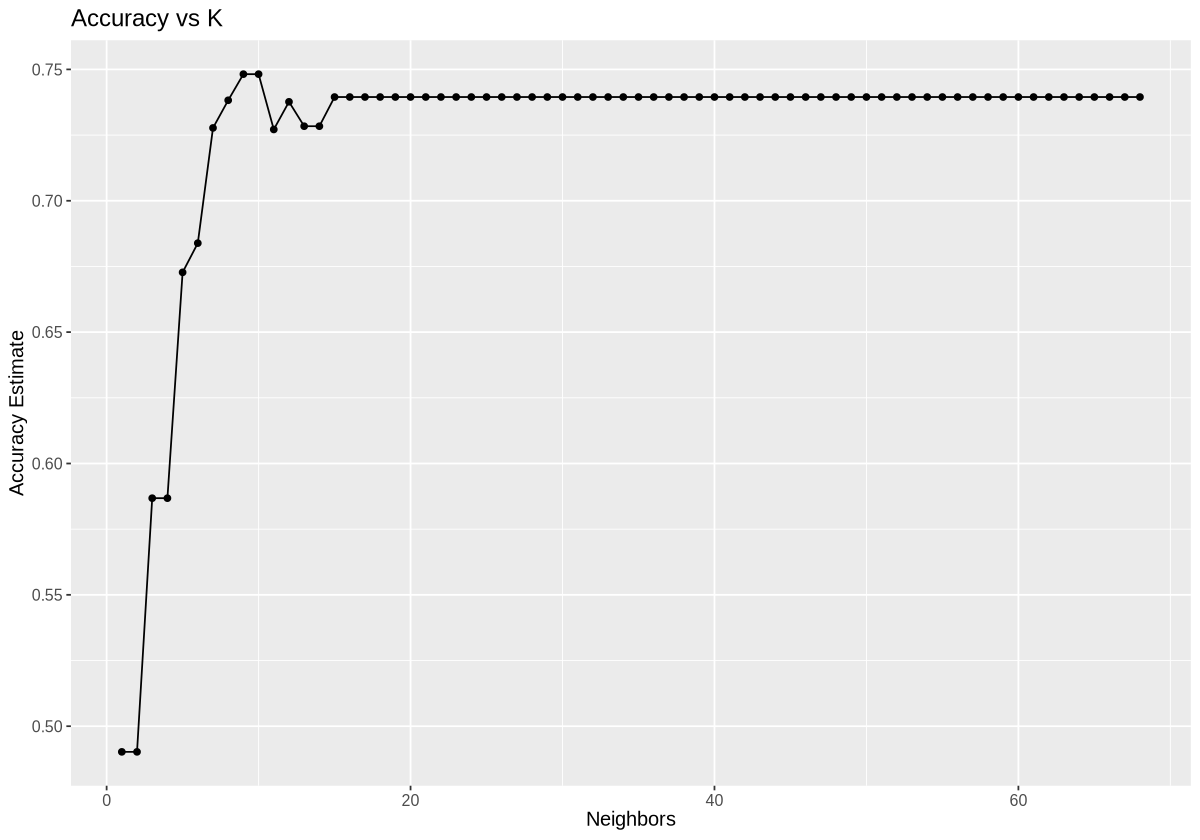

In [20]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12)) +
  ggtitle ("Accuracy vs K")
accuracy_vs_k


best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

**Figure 11** \
By arranging the accuracy results for the k-values from highest to lowest, **K = 9** has the highest accuracy. The accuracy vs K plot also shows peak accuracy at k = 9 and k = 10.  

## Results ##

## 9. Testing the KNN Model ##
We now create our classification model using the best K-value we determined earlier **(K = 9)**. \
We use the model to `predict` on the unseen `players_test` data.

In [23]:
players_best_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = best_k) |>
       set_engine("kknn") |>
       set_mode("classification")

players_best_fit <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(players_best_spec) |>
       fit(data = players_train )
players_best_fit

subscription_predictions <- predict(players_best_fit, players_test) |>
bind_cols(players_test)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.25
Best kernel: rectangular
Best k: 9

## 10. Evaluating the Model's Accuracy ##

We are interested in how well our model was able to predict the actual subscription of the players in the dataset.  
We used `metrics(...)` to calculate the performance metrics (accuracy, precision, & recall)\
We are comparing the actual class `truth = subscribe` from `players_test` to the predicted class from the model `estimate = .pred_class` \
We `filter(.metric == "accuracy")` to select just the accuracy (the proportion of correct predictions). \
we use `conf_mat(...)` to compute a confusion matrix that shows how well our model classified each class.

metrics<- subscription_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

**Figure 12** \
We can see that the model has a 74% accuracy in predicting the correct class of the players in the testing set.

In [25]:
confusion <- subscription_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE      7   22

**Figure 13** \
The table shows that **23/31** observations were accurately classified. There is also a tendency for players to be falsely classified as `TRUE` **(7/31)**. 

<H1>Discussion </H1>

## Conclusions: ##
Looking at the data found above, we are unable to conclude much about which behaviours and characteristics lead to a willngness to subscribe to a newsletter at a satisfactory level of accuracy. Using the 3 numerical variables selected (`sessions_count`, `Age` and `played_hours`), the most accurate model had a roughly 74% accuracy, which is not strong enough considering predicting every user is willing to subscribe nets only a slightly lower accuracy. While there may be some trends that exist that can be seen in the exploratory visualizations (older people are less likely to subscribe, those who play more are more willing to subscribe), there is a large glut of data where the user did not play a significant amount of time and is around age 20 where the willingness to subscribe appears random by the predictors utilized. Because of this inability to properly classify the willingness to subscribe of this large portion of the dataset, it is reasonable to state that our results are inconclusive.

## Model Expectations: ##

This lack of decisive outcome was the expected result for a k-Nearest Neighbors classification model that is based off the data set that was provided. The kNN algorithm relies heavily on patterns in the data and performs best when clear, separable groupings exist based on the selected features. However, the variables chosen (`sessions_count`, `Age`, and `played_hours`) likely do not offer strong and clear enough correlation to effectively predict subscribers from non-subscribers. The observed accuracy, that was only marginally better than predicting all users as subscribers, is typical when class boundaries are not well-defined or the data is noisy. Ultimately, a larger sample of users, with more varied playtimes, would likely be required to determine if these variables are capable of creating a kNN model that accurately predicts user newsletter subscriptions

## Impact of Results: ##


The findings from this analysis likely don’t hold much significance to our original question, although it may highlight shortcomings in data collection for the type of study conducted (kNN Classification). Firstly, the findings suggest that the current data being collected may not be enough to accurately predict user interest in subscribing to the Minecraft newsletter. This could indicate a need to revisit what types of user behavior information are being tracked or the methods that are being used to record this data, as other variables might be more informative. Secondly, the inconclusive results may indicate that non-gameplay metric data (such as available free time) could prove more insightful for deriving relevant information on newsletter subscriptions. For researchers, this could mean better tailoring the information they collect to the variable they wish to study (ie: recording variables that are more likely to be correlated with newsletter subscription status) or choosing a research question that the data set is capable of providing insight towards. 


## Future Questions: ##
While our results were inconclusive, that doesn't mean nothing can be drawn from the results. Knowing the fact that in some parts of the data there existed some small trends inspires follow-up questions such as "What makes a user unwilling to subscribe?" or "If there were a larger dataset with more varied data, could a conclusion be drawn from the same predictive variables?". Expanding the scope, one could also ponder the connection between the willingness to subscribe and other important metrics to the scope of the Minecraft Server such as willingness to support financially or likelihood of recommending the server to a friend. The inconclusive result is not a signal to end the research into the initial question, but a sign that more sub-questions need to be asked in order to answer if there exists player types that predict whether they will subscribe to the newsletter or not.